**Group-08**<br/>
<font style="color:red"> **Belhassen Ghoul <br/> Robin Ehrensperger <br/> Dominic Diedenhofen**</font>

### Download Data

The data is taken from http://archive.ics.uci.edu/ml/machine-learning-databases/00240/, but you can have it in the form of the UCI-HAR-Dataset.zip.

Extract it to the folder of your notebook with the solution (or suitably adjust the paths to training and test data specified below (TRAIN, TEST).  

Spcifically, the split into training and testing data is already done. The dataset contains 7352 training and 2947 test samples.  

Each sample consists of nine timeseries of float values, each of length 128.

The nine timeseries are collected by an accelerometer and a gyroscope that contain information about the motion and the orientation, respectively.

In [38]:
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Load Data

In [39]:
# Useful Constants
TRAIN = "UCI_HAR_Dataset/train/"
TEST = "UCI_HAR_Dataset/test/"

# x-values, 'signals'
# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]
X_train_signals_paths = [TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES]
X_test_signals_paths =  [TEST  + "Inertial Signals/" + signal + "test.txt"  for signal in INPUT_SIGNAL_TYPES]


# y-values, 'labels'
#Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]
N_CLASSES = len(LABELS)
y_train_path = TRAIN + "y_train.txt"
y_test_path  = TEST  + "y_test.txt"

In [40]:
# Load "X" (the neural network's training and testing inputs)
def load_X(X_signals_paths):
    X_signals = []
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)
print(X_train.shape, X_test.shape)

(7352, 128, 9) (2947, 128, 9)


In [41]:
# Load "y" (the neural network's training and testing outputs)
def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()
    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

def one_hot(y, n_classes):
    y = y.reshape(len(y))
    return np.eye(n_classes)[np.array(y, dtype=np.int32)]

def label_from_onehot(vectors):
    indices = []
    for vector in vectors:
        indices.append(np.argmax(vector))
    return np.array(indices)

Y_train = one_hot(load_y(y_train_path),N_CLASSES)
Y_test = one_hot(load_y(y_test_path),N_CLASSES)
print(Y_train.shape, Y_test.shape)

(7352, 6) (2947, 6)


#### Plot some samples

In [42]:
X_train_per_class = {}
for c in range(N_CLASSES):
    mask = ... # select sample of given class c
    X_train_per_class[c] = X_train[mask]

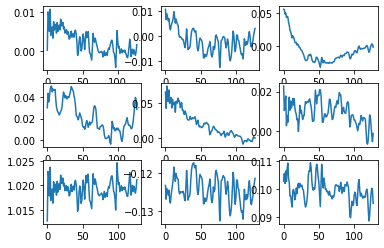

In [43]:
def plot_lines(X, nsamples):
    t = range(128)
    for i in range(9):
        plt.subplot(3,3,i+1)
        for j in range(np.minimum(X.shape[0],nsamples)):
            plt.plot(t,X[j,:,i])
    plt.show()
    
plot_lines(X_train_per_class[1], 1)

In [44]:
# Input Data
training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
means = np.mean(X_train, axis=(0,1))
stdevs = np.std(X_train, axis=(0,1))

print("X shape, Y_shape:")
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print()
print("Mean / Stdev for each feature:")
for i in range(9):
    print("%7.4f | %7.4f"%(means[i], stdevs[i]))

X shape, Y_shape:
(7352, 128, 9) (7352, 6)
(2947, 128, 9) (2947, 6)

Mean / Stdev for each feature:
-0.0006 |  0.1948
-0.0003 |  0.1224
-0.0003 |  0.1069
 0.0005 |  0.4068
-0.0008 |  0.3819
 0.0001 |  0.2557
 0.8047 |  0.4141
 0.0288 |  0.3910
 0.0865 |  0.3578


### Dataset

If suitable specify Dataset (e.g. in PyTorch).

In [45]:
#don't know what you mean with this statement...

### Normalization

...

## Specify and Train Models

Try different architectures to solve the activity recognition problem.

At minimum implement
* Model with a single layer of SimpleRNN
* Model with a single layer of LSTM
* Model with several layers of LSTMs
* Model with several CNN layers
* MLP

Try with different number of units. Add regularisation if needed (e.g. when working with MLPs).

Report about your findings.

### Single Layer SimpleRNN

In [46]:
#Hyperparameter
batch_size= 64
nepochs = 30
nHidden =20
inputShape = (len(X_train[0]) ,len(X_train[0][0]) )

In [47]:
### START YOUR CODE

# SimpleRNN, single layer with tf.keras....
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
model1 = Sequential()
model1.add(SimpleRNN(units=nHidden, input_shape=inputShape))
model1.add(Dense(N_CLASSES, activation="softmax"))
model1.summary()

model1.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


### END YOUR CODE

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 20)                600       
                                                                 
 dense_4 (Dense)             (None, 6)                 126       
                                                                 
Total params: 726
Trainable params: 726
Non-trainable params: 0
_________________________________________________________________


In [48]:
log = model1.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))


Epoch 1/30
115/115 [==============================] - 9s 72ms/step - loss: 1.4957 - accuracy: 0.4380 - val_loss: 1.3441 - val_accuracy: 0.4642
Epoch 2/30
115/115 [==============================] - 8s 70ms/step - loss: 1.1824 - accuracy: 0.5461 - val_loss: 1.2416 - val_accuracy: 0.5195
Epoch 3/30
115/115 [==============================] - 8s 71ms/step - loss: 1.0845 - accuracy: 0.5865 - val_loss: 1.2703 - val_accuracy: 0.4930
Epoch 4/30
115/115 [==============================] - 8s 70ms/step - loss: 1.3317 - accuracy: 0.4737 - val_loss: 1.3629 - val_accuracy: 0.4143
Epoch 5/30
115/115 [==============================] - 8s 71ms/step - loss: 1.1858 - accuracy: 0.4978 - val_loss: 1.3128 - val_accuracy: 0.4561
Epoch 6/30
115/115 [==============================] - 8s 70ms/step - loss: 1.1116 - accuracy: 0.5645 - val_loss: 1.1914 - val_accuracy: 0.5246
Epoch 7/30
115/115 [==============================] - 8s 70ms/step - loss: 1.0872 - accuracy: 0.5605 - val_loss: 1.1772 - val_accuracy: 0.5219

Test loss: 0.7666425704956055
Test accuracy: 0.7037665247917175
Test accuracy: 0.7835962772369385


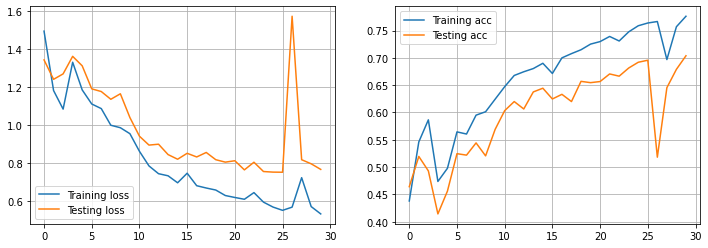

In [49]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model1.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model1.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> we should do some early stoping between epoch 20-25 The classification with the Simple RNN doesn't work well so let's see how the other model works </font>

### LSTM

In [50]:
### START YOUR CODE
from keras.layers import LSTM

n_steps = len(X_train[0])
n_input = len(X_train[0][0])

model2 = Sequential()
model2.add(LSTM(units=nHidden,return_sequences=False,input_shape = (n_steps,n_input)))
model2.add(Dense(N_CLASSES,activation="softmax"))

model2.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.summary()

### END YOUR CODE

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20)                2400      
                                                                 
 dense_5 (Dense)             (None, 6)                 126       
                                                                 
Total params: 2,526
Trainable params: 2,526
Non-trainable params: 0
_________________________________________________________________


In [51]:
log = model2.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))


Epoch 1/30
115/115 [==============================] - 2s 13ms/step - loss: 1.5251 - accuracy: 0.3443 - val_loss: 1.2004 - val_accuracy: 0.5585
Epoch 2/30
115/115 [==============================] - 1s 9ms/step - loss: 0.9298 - accuracy: 0.6464 - val_loss: 0.8675 - val_accuracy: 0.6244
Epoch 3/30
115/115 [==============================] - 1s 10ms/step - loss: 0.7433 - accuracy: 0.6907 - val_loss: 0.8356 - val_accuracy: 0.6227
Epoch 4/30
115/115 [==============================] - 1s 9ms/step - loss: 0.6768 - accuracy: 0.7091 - val_loss: 0.7267 - val_accuracy: 0.7021
Epoch 5/30
115/115 [==============================] - 1s 10ms/step - loss: 0.6388 - accuracy: 0.7633 - val_loss: 0.6574 - val_accuracy: 0.7445
Epoch 6/30
115/115 [==============================] - 1s 9ms/step - loss: 0.5249 - accuracy: 0.8036 - val_loss: 0.6469 - val_accuracy: 0.7333
Epoch 7/30
115/115 [==============================] - 1s 10ms/step - loss: 0.6038 - accuracy: 0.7843 - val_loss: 0.5768 - val_accuracy: 0.7784
Ep

Test loss: 0.3151130676269531
Test accuracy: 0.8927723169326782
Test accuracy: 0.9544341564178467


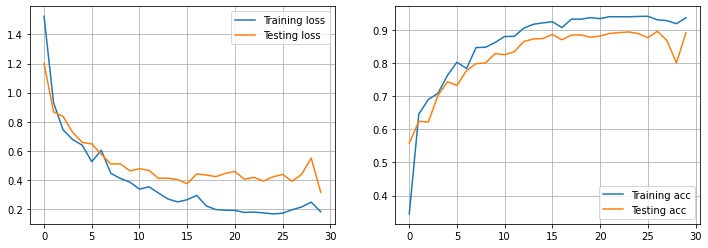

In [52]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model2.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> I'm impressed from this simple one layer LSTM model how accurate it works </font>

### Stacked LSTMs

In [55]:
### START YOUR CODE
model3 = Sequential()
model3.add(LSTM(units=nHidden,return_sequences=True,input_shape = (n_steps,n_input)))
model3.add(LSTM(units=nHidden,return_sequences=True))
model3.add(LSTM(units=nHidden,return_sequences=False))
model3.add(Dense(N_CLASSES,activation="softmax"))

model3.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model3.summary()

### END YOUR CODE

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128, 20)           2400      
                                                                 
 lstm_5 (LSTM)               (None, 128, 20)           3280      
                                                                 
 lstm_6 (LSTM)               (None, 20)                3280      
                                                                 
 dense_7 (Dense)             (None, 6)                 126       
                                                                 
Total params: 9,086
Trainable params: 9,086
Non-trainable params: 0
_________________________________________________________________


In [56]:
log = model3.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))

Epoch 1/30
115/115 [==============================] - 6s 32ms/step - loss: 1.1903 - accuracy: 0.5126 - val_loss: 0.9382 - val_accuracy: 0.5874
Epoch 2/30
115/115 [==============================] - 3s 25ms/step - loss: 0.7906 - accuracy: 0.6451 - val_loss: 0.8474 - val_accuracy: 0.6546
Epoch 3/30
115/115 [==============================] - 3s 26ms/step - loss: 0.6734 - accuracy: 0.6979 - val_loss: 0.7908 - val_accuracy: 0.6916
Epoch 4/30
115/115 [==============================] - 3s 25ms/step - loss: 0.6995 - accuracy: 0.6930 - val_loss: 0.7614 - val_accuracy: 0.6535
Epoch 5/30
115/115 [==============================] - 3s 25ms/step - loss: 0.5476 - accuracy: 0.7493 - val_loss: 0.7468 - val_accuracy: 0.6926
Epoch 6/30
115/115 [==============================] - 3s 25ms/step - loss: 0.4827 - accuracy: 0.7802 - val_loss: 0.6200 - val_accuracy: 0.7302
Epoch 7/30
115/115 [==============================] - 3s 26ms/step - loss: 0.4670 - accuracy: 0.7905 - val_loss: 0.6278 - val_accuracy: 0.7357

Test loss: 0.4966127574443817
Test accuracy: 0.8737699389457703
Test accuracy: 0.9525299072265625


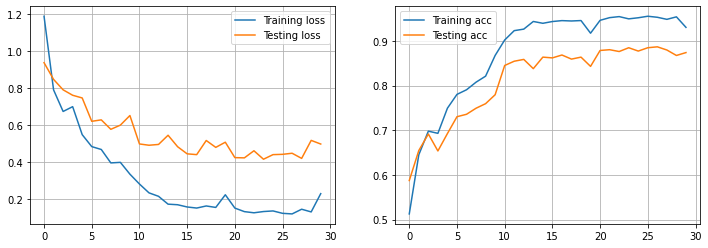

In [57]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model3.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> the model works quite well like the simple one </font>

### CNN (Conv1d)

In [79]:
### START YOUR CODE
from keras.layers import Conv1D,Flatten

model4 = Sequential()
model4.add(Conv1D(16,kernel_size=3, strides=2,padding="same",input_shape = (n_steps,n_input)))
model4.add(Conv1D(32,kernel_size=3,strides=2,padding='same'))
model4.add(Conv1D(64,kernel_size=3,strides=2,padding='same'))
model4.add(Conv1D(128,kernel_size=3,strides=2,padding='same'))
model4.add(Conv1D(256,kernel_size=3,strides=2,padding='same'))
model4.add(Conv1D(512,kernel_size=3,strides=2,padding='same'))
model4.add(Flatten())
model4.add(Dense(N_CLASSES,activation="softmax"))

model4.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model4.summary()

### END YOUR CODE

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_60 (Conv1D)          (None, 64, 16)            448       
                                                                 
 conv1d_61 (Conv1D)          (None, 32, 32)            1568      
                                                                 
 conv1d_62 (Conv1D)          (None, 16, 64)            6208      
                                                                 
 conv1d_63 (Conv1D)          (None, 8, 128)            24704     
                                                                 
 conv1d_64 (Conv1D)          (None, 4, 256)            98560     
                                                                 
 conv1d_65 (Conv1D)          (None, 2, 512)            393728    
                                                                 
 flatten_3 (Flatten)         (None, 1024)            

In [80]:
log = model4.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))

Epoch 1/30
115/115 [==============================] - 1s 7ms/step - loss: 1.0780 - accuracy: 0.5472 - val_loss: 1.2373 - val_accuracy: 0.5327
Epoch 2/30
115/115 [==============================] - 1s 5ms/step - loss: 1.0134 - accuracy: 0.5725 - val_loss: 1.2841 - val_accuracy: 0.4795
Epoch 3/30
115/115 [==============================] - 1s 4ms/step - loss: 0.9701 - accuracy: 0.5933 - val_loss: 1.1742 - val_accuracy: 0.5456
Epoch 4/30
115/115 [==============================] - 1s 4ms/step - loss: 0.9438 - accuracy: 0.6185 - val_loss: 1.2248 - val_accuracy: 0.4995
Epoch 5/30
115/115 [==============================] - 1s 4ms/step - loss: 0.9514 - accuracy: 0.6126 - val_loss: 1.2975 - val_accuracy: 0.5120
Epoch 6/30
115/115 [==============================] - 1s 5ms/step - loss: 0.9385 - accuracy: 0.6299 - val_loss: 1.1617 - val_accuracy: 0.5501
Epoch 7/30
115/115 [==============================] - 1s 4ms/step - loss: 0.9339 - accuracy: 0.6300 - val_loss: 1.3499 - val_accuracy: 0.5558
Epoch 

In [ ]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model4.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> the model doesn't works well like the LSTM model doen't matter how I change the model... </font>

### MLP

In [81]:
### START YOUR CODE

model5= Sequential()
model5.add(Flatten(input_shape=inputShape))
model5.add(Dense(128,activation="relu"))
model5.add(Dense(N_CLASSES,activation="sigmoid"))

model5.compile(loss = "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model5.summary()
### END YOUR CODE

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_24 (Dense)            (None, 128)               147584    
                                                                 
 dense_25 (Dense)            (None, 6)                 774       
                                                                 
Total params: 148,358
Trainable params: 148,358
Non-trainable params: 0
_________________________________________________________________


In [82]:
log = model5.fit(x=X_train,y=Y_train,batch_size=batch_size,epochs=nepochs, validation_data=(X_test,Y_test))

Epoch 1/30
115/115 [==============================] - 1s 4ms/step - loss: 0.6393 - accuracy: 0.7855 - val_loss: 0.5669 - val_accuracy: 0.8331
Epoch 2/30
115/115 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.9221 - val_loss: 0.4411 - val_accuracy: 0.8649
Epoch 3/30
115/115 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9403 - val_loss: 0.3857 - val_accuracy: 0.8755
Epoch 4/30
115/115 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.9491 - val_loss: 0.3565 - val_accuracy: 0.8867
Epoch 5/30
115/115 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9509 - val_loss: 0.3646 - val_accuracy: 0.8856
Epoch 6/30
115/115 [==============================] - 0s 2ms/step - loss: 0.1237 - accuracy: 0.9504 - val_loss: 0.3613 - val_accuracy: 0.8850
Epoch 7/30
115/115 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9539 - val_loss: 0.3540 - val_accuracy: 0.8904
Epoch 

Test loss: 0.6407670378684998
Test accuracy: 0.8741092681884766
Test accuracy: 0.9702121615409851


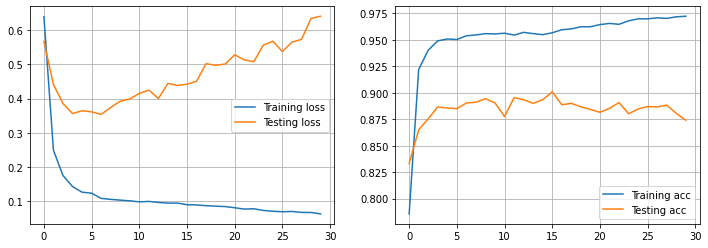

In [83]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model5.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)
loss_train, metric_train = model5.evaluate(X_train, Y_train, verbose=0)
print('Test accuracy:', metric_train)

#### Findings

<font style="color:red"> Wow I'm really impressed such a simple small model like the MLP outperform all other fancy models!!! </font>